In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import altair as alt
import math

plt.style.use('default')
plt.rcParams["font.family"] = "Helvetica"

df_ebola = pd.read_csv('ebola.csv')
df_h1n1 = pd.read_csv('h1n1.csv')
df_mers = pd.read_csv('mers_cov.csv')
df_sars = pd.read_csv('sars_cov1.csv')
df_measles = pd.read_csv('measles.csv')
df_polio = pd.read_csv('polio.csv')

df_ebola['disease'] = 'ebola'
df_h1n1['disease'] = 'h1n1'
df_mers['disease'] = 'mers_cov'
df_sars['disease'] = 'sars'
df_measles['disease'] = 'measles'
df_polio['disease'] = 'polio'
df_polio = df_polio.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_sars = df_sars.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_mers = df_mers.rename(columns={'infection_incidence_count (wild)': 'infection_incidence_count',\
                                    'vaccination_licensed':'licensed_vaccine'})
df_ebola = df_ebola.rename(columns={'declared_pandemic_outbreak': 'declared_pandemic'})
frames = [df_ebola, df_h1n1, df_mers, df_sars, df_measles, df_polio]

#concatenate dataframes
df = pd.concat(frames, sort=True)
years = df['year'].unique().tolist()
years.sort()
years = years[-21:]
diseases = df['disease'].unique().tolist()

df_polio

,year,linked_to_disease,declared_pandemic,licensed_vaccine,infection_incidence_count,infection_incidence_count(vaccine_derived),Polio-compatible case,death_count,Source,disease
0,1916,True,True,False,NaN,NaN,NaN,NaN,https://extranet.who.int/polis/public/CaseCoun...,polio
1,1917,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
2,1918,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
3,1919,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
4,1920,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
5,1921,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
6,1922,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
7,1923,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
8,1924,False,False,False,NaN,NaN,NaN,NaN,NaN,polio
9,1925,False,False,False,NaN,NaN,NaN,NaN,NaN,polio


# Test plot
dot plot: https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot

['ebola', 'h1n1', 'mers_cov', 'sars', 'measles', 'polio']


/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6652: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


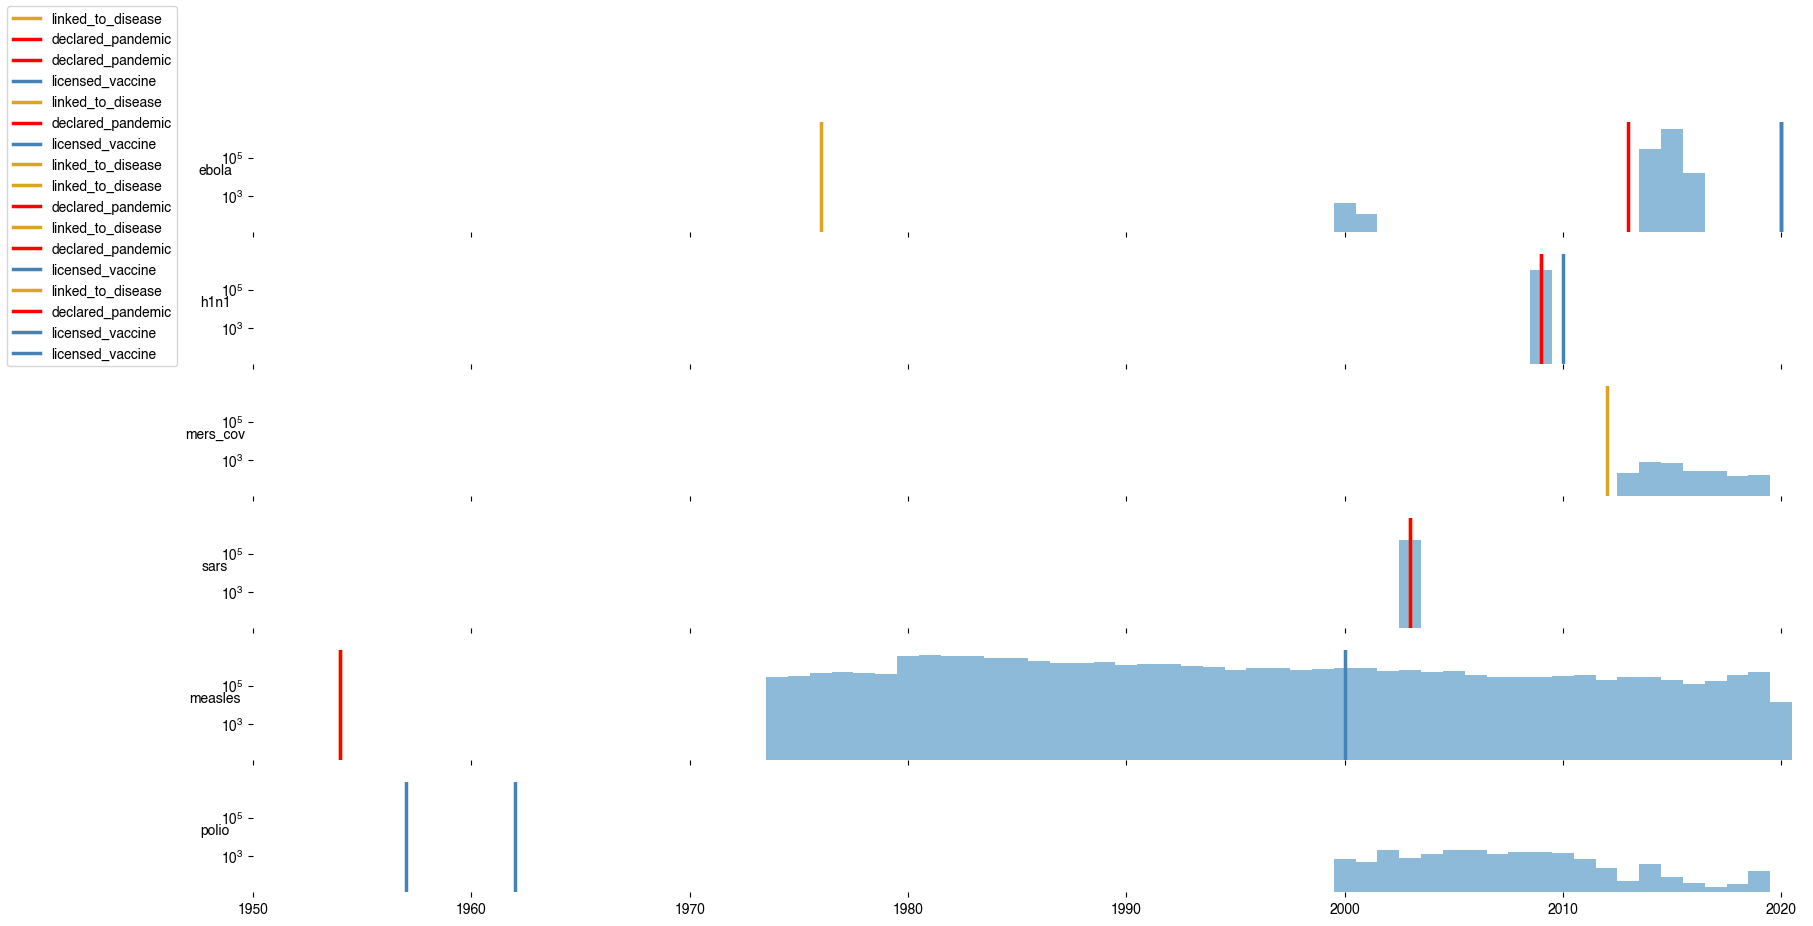

In [55]:
# diseases.insert(0, '')
# diseases.append('null')
fig, axs = plt.subplots(len(diseases), 1, figsize=(20, 10), sharex=True, sharey=True)
print(diseases)
# axs[-1].set_xticklabels([2000, 2020])
dates = {'linked_to_disease': 'goldenrod', 'declared_pandemic':'red', 'licensed_vaccine':'steelblue'}


for i, df in enumerate(frames):
    # sample = df.dropna(subset=['infection_incidience_count'])
    axs[i].bar(df['year'], df['infection_incidence_count'], width=1, alpha=0.5)# , 'o', ls='-', ms=4)
    limits = [0, math.ceil(df['infection_incidence_count'].max()/10) * 10]
    axs[i].set_xlim([1950, 2021])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].set_ylabel(df['disease'].unique()[0], rotation='horizontal')
    axs[i].set_yscale('log')
#     axs[i].set_ylim([0, 10**7])
    for date in dates:
        sample = df[df[date] == True]
        for r, row in sample.iterrows():
            color = dates[date]
            axs[i].axvline(row['year'], limits[0], limits[1], c=color, label=date, linewidth=2.5)
            
fig.legend(loc='upper left')

fig.savefig('testfig.png')

In [ ]:
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
)

In [ ]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
chart = alt.Chart(data)
alt.Chart(data).mark_point()

In [ ]:
alt.Chart(data).mark_point().encode(
    x='a',
)